# Consumer Loan Default Prediction
#### <font color=blue|red|pink>Project by Rahul C Pal</font>

## Introduction to the Project
Banks play a crucial role in market economies. The loan is one of the most important products of the banking. All the banks are trying to figure out effective business straregies to persuade customers to implements their loans. But some cutomers are behave very negatively after their application approved. To cease this situation, bank have to find some method to predict customers behavior.

## Overview of the Project 
1. Problem Statement
2. Exploratory Data Analysis
3. Data Cleaning
    * Identify Outliers and Missing Values
    * Outliers and Missing values Treatments
    * Clean Data
    * Prepare Data for Analysis
4. Model Building
    * Logistic Regression
    * Decision Trees
    * Neural Networks
    * Support Vector Machine
    * Random Forest
    * Boosting
5. Model Validation
    * Accuracy
    * Sensitivity & Specificity
    * AUC & ROC
6. Conclusion

### <font color=blue|red|pink|>Problem Statement</font>
Build a model which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted and borrowers can use to help make the best financial decisions.

The goal is to build a different-different model that banks can use to help predict the customers behaviour

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


In [0]:
pip install statsmodels==0.10.0rc2 --pre

     |████████████████████████████████| 8.1MB 4.7MB/s 
  Found existing installation: statsmodels 0.10.0
    Uninstalling statsmodels-0.10.0:
      Successfully uninstalled statsmodels-0.10.0


In [0]:
from google.colab import files
uploaded = files.upload()

Saving cs-training.csv to cs-training.csv


### Exploratory Data Analysis
The dataset has 150000 rows and 12 columns. The columns represent variable names, indicates information borrowers and the outcomes of their loan repayment. SeriousDiqin2yrs columns is target of our algorithm. This is credit data, last two years data 150000 borrowers in this dataset. Two year back already gave loan to this customers some of pay back some are delinquent(bad customer).

Here we can not directly start the analysis with raw data. Becuase raw data may be in wrong format, might have missing values , outliers, erroneous values.

Before building the model, we have to explore each variable. Along with the data we have data dictionary, In which explanation about each variable is provided.
In data Exploration we have to check each variable, whether variables have same data type as mentioned in data dictionary, what are the unique identifiers it have , Is there any default value or any missing values  inthe dataset etc.

Let’s load the data and check:

*  Data types of each feature
*  If we have missing values
*  If we have defualt values or some outliers.

In [0]:
loans = pd.read_csv('cs-training.csv')

#### How many row and columns in dataset

In [0]:
loans.shape

(150000, 12)

Dataset has 150000 rows and 12 columns.

First 5 obesrvation of datasets

In [0]:
loans.head()

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Variable names

In [0]:
loans.columns.values

array(['Sr_No', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

#### Type of variable integers/floats/binary :

In [0]:
loans.dtypes

Sr_No                                     int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

* SeriousDlqin2yrs are recorded as 0 and 1 for 0-No and 1- Yes. In data dictionary NumberOfDependents are in integer but here given in floats.

In [0]:
loans.head(10)

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


After looking first 10 observation, monthlyIncome has NaN values or missing values and also NumberOfDependents has Nan value.  Unique indentifier is Sr_No for loans dataset.


Now we start the data exploration basically in three steps :
*  Categorical variables exploration
*  Continuous variables exploration
*  Missing Values and Outlier Treatment

#### For Checking a missing values in a particular columns

In [0]:
for i in range(len(loans.columns)):
    s = 0
    s = sum(loans[loans.columns[i]].isnull())/len(loans)*100
    print(loans.columns[i],":",s)

Sr_No : 0.0
SeriousDlqin2yrs : 0.0
RevolvingUtilizationOfUnsecuredLines : 0.0
age : 0.0
NumberOfTime30-59DaysPastDueNotWorse : 0.0
DebtRatio : 0.0
MonthlyIncome : 19.820666666666668
NumberOfOpenCreditLinesAndLoans : 0.0
NumberOfTimes90DaysLate : 0.0
NumberRealEstateLoansOrLines : 0.0
NumberOfTime60-89DaysPastDueNotWorse : 0.0
NumberOfDependents : 2.616


Percenatge of missing values for each variable: NumberOfDependent variable has 2.6% and MonthlyIncome has 19.82% missing values. Other variable have no missining values .

**Findings** :

* Continuos variables - RevolvingUtilizationOfUnsecuredLines, DebtRatio,   MonthlyIncome.

* Discrete variables -SeriousDlqin2yrs, Age ,NumberOfTime30-59DaysPastDueNotWorse, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents.

For continuous variable we will check  : Min, Max, Median, Mean, sd, Var,  Quartiles
and box plots for identification of outliers.

For discrete variable we will check: Frequencies , help us understanding the variable by looking at the values it’s taking and data
count at each value.


#### Discrete Variable : 
#### For SeriousDlqin2yrs :

In [0]:
a = sum(loans['SeriousDlqin2yrs']==0)
print(a)
loans['SeriousDlqin2yrs'].value_counts()

139974


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

* 139974 person are good customer and only 10026 person are bad customer

#### For age :

In [0]:
loans['age'].value_counts(sort=False).head()

0       1
21    183
22    434
23    641
24    816
Name: age, dtype: int64

* Issue here is one customer age is 0.

#### For NumberOfTime30-59DaysPastDueNotWorse :

In [0]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

* Issue some customers are late more than 24 time like 96 and 98. Here 264 customers are late 96/98 times.

#### For NumberOfOpenCreditLinesAndLoans :

In [0]:
loans['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=False)

0      1888
1      4438
2      6666
3      9058
4     11609
5     12931
6     13614
7     13245
8     12562
9     11355
10     9624
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
37        7
38       13
39        9
40       10
41        4
42        8
43        8
44        2
45        8
46        3
47        2
48        6
49        4
50        2
51        2
52        3
53        1
54        4
56        2
57        2
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

* Issue is some customers are more than 20 loans. Is this practically possible? but in this case we will not consider this  as issue.

#### For NumberOfTimes90DaysLate :

In [0]:
loans['NumberOfTimes90DaysLate'].value_counts(sort=False)

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

* Issue is same as number of time 30-59 days. some customers are 96 times late.

#### For NumberRealEstateLoansOrLines :

In [0]:
loans['NumberRealEstateLoansOrLines'].value_counts(sort=False)

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

* Issue is some customers have more than 20 loan.

#### For NumberOfTime60-89DaysPastDueNotWorse :

In [0]:
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(sort=False)

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

* Same issue with 30-59 days. some customer are due more than 96 times.

#### For NumberOfDependents :

In [0]:
loans['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

No issue in this variable.

#### Continuous variable :

#### For RevolvingUtilizationOfUnsecuredLines :

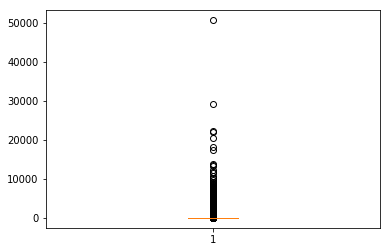

In [0]:
import matplotlib.pyplot as plt
plt.boxplot(loans.RevolvingUtilizationOfUnsecuredLines)
plt.show()

In [0]:
util_percentile = loans['RevolvingUtilizationOfUnsecuredLines'].quantile([0.05,0.1,0.25,0.5,0.75,0.80,0.90,0.91,0.95,0.96,0.97,0.98,0.99,1])
round(util_percentile,2)

0.05        0.00
0.10        0.00
0.25        0.03
0.50        0.15
0.75        0.56
0.80        0.70
0.90        0.98
0.91        1.00
0.95        1.00
0.96        1.00
0.97        1.00
0.98        1.01
0.99        1.09
1.00    50708.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

Issue is 2% customer are swipping more than 100% limit, how it is possible? that means there are some outliers.

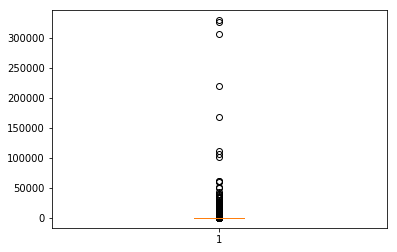

In [0]:
plt.boxplot(loans.DebtRatio)
plt.show()

In [0]:
debt_percentile = loans['DebtRatio'].quantile([0.05,0.1,0.25,0.5,0.75,0.80,0.90,0.91,0.95,0.96,0.97,0.98,0.99,1])
round(debt_percentile,2)

0.05         0.00
0.10         0.03
0.25         0.18
0.50         0.37
0.75         0.87
0.80         4.00
0.90      1267.00
0.91      1462.00
0.95      2449.00
0.96      2791.00
0.97      3225.00
0.98      3839.00
0.99      4979.04
1.00    329664.00
Name: DebtRatio, dtype: float64

20% customer has debtratio more than 100% it is not possible beacuse debt ratio is in percentage 

In [0]:
income_percentile = loans['MonthlyIncome'].quantile([0.05,0.1,0.25,0.5,0.75,0.80,0.90,0.91,0.95,0.96,0.97,0.98,0.99,1])
round(income_percentile,2)

0.05       1300.00
0.10       2005.00
0.25       3400.00
0.50       5400.00
0.75       8249.00
0.80       9083.00
0.90      11666.00
0.91      12000.00
0.95      14587.60
0.96      15636.28
0.97      17000.00
0.98      19600.00
0.99      25000.00
1.00    3008750.00
Name: MonthlyIncome, dtype: float64

MonthlyIncome has missing values.

In [0]:
loans['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [0]:
loans['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In this variable, mean and median are not closed.

Our datasets : **Summary**
1. In RevolvingUtilizationOfUnsecuredLines Issue is 3% customer are swipping more than 100% limit, so when utilization is more than 1 then it can be replaced by median.
2.  In NumberOfTime30-59DaysPastDueNotWorse Issue some customers are late more than 24 time like 96 and 98. Here 264 customers are late 96/98 times. FIrst We calculate % of default values then we crosstab with target varaible.
3. In Debtration Issue is 25% customer are DebtRatio more than 100% limit. So here first we add indicator variable if DebtRatio >1 is equal to 1 otherwise 0 then if DebtRatio is greater than 1, replace DebtRatio with mean value of all less than 1 value.
4. In MonthlyIncome Issue is 19.82% customer have missing values. So here also first we add Indicator variable as missing_value =1, non-missing_value =0 then we replace all missing value with meadian.
5.  NumberOfTime90DaysPastDueNotWorse and NumberOfTime60-89DaysPastDueNotWorse is same treatment as NumberOfTime30-59DaysPastDueNotWorse. 
6. In NumberDependence 2.6% missing values. We replace all missing value with most occured value .
7. In  Age Issue here is one customer age is 0. We Replaced 0 age with median.

#### Outliers and Missing Values Treatments :

**For Discrete variable:**

*  If  Percent of missing/Outliers is very less (<10%) then Replace the missing with       most probable category/class. Look at the cross tab of variable vs target. Impute based on traget.

*   If Percent of missing/Outliers is Medium(10%to 50%) then  rename the missing      class as “Missing” . For numeric discrete class, create a new variable and                 replace missing values with mean or median.

*   If Percent of missing/Outliers is High(>50%) then name the missing category as   "missing", club rest all categories as “Non-missing”.

**For Continuous variable:**

*  If  Percent of missing/Outliers is very less (<10%) then Replace the missing with mean or median for continuous.

*   If Percent of missing/Outliers is Medium(10%to 50%) then  Create a new     variable missing & Non Missing Category Replace the missing values in the original variables with Mean or median.

*   If Percent of missing/Outliers is High(>50%) then Create a new indicator variable missing and non-missing. Drop the original variable.

Now start with variable treatment.


#### For RevolvingUtilizationOfUnsecuredLines :


Issue is 3% customer are swipping more than 100% limit, so when utilization is more than 1 then it can be replaced by median

In [0]:
median_util=loans['RevolvingUtilizationOfUnsecuredLines'].median()
median_util

0.154180737

In [0]:
loans['RevolvingUtilizationOfUnsecuredLines'][loans['RevolvingUtilizationOfUnsecuredLines']>1]=median_util 
loans['RevolvingUtilizationOfUnsecuredLines'].head()

0    0.766127
1    0.957151
2    0.658180
3    0.233810
4    0.907239
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

**Percentile distribution for new variable :**

In [0]:
util_percentiles1=loans['RevolvingUtilizationOfUnsecuredLines'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.99,1])
round(util_percentiles1,2)

0.050    0.00
0.100    0.00
0.250    0.03
0.500    0.15
0.750    0.51
0.800    0.63
0.900    0.93
0.910    0.95
0.950    1.00
0.960    1.00
0.970    1.00
0.975    1.00
0.990    1.00
1.000    1.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### For NumberOfTime30-59DaysPastDueNotWorse :

*   Issue: some customers are late more than 24 times like 96 and 98.
*   FIrst We calculate % of default values then we crosstab with target variable.



In [0]:
freq_table_30dpd = loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)
freq_table_30dpd[13:len(freq_table_30dpd)]
freq_table_30dpd[13:len(freq_table_30dpd)].sum()/freq_table_30dpd.sum()*100

0.18

**Impute based on target variable :**

In [0]:
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


Cross tab row Percentages :

In [0]:
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.astype(float).div(cross_tab_30dpd_target.sum(axis=1), axis=0)
round(cross_tab_30dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.47,0.53
7,0.48,0.52
8,0.68,0.32


After  finding row percentage , NumberOfTime30-59DaysPastDueNotWorse , 98 days late is closer to the perecenatge for  6 Days late. So we replace more than 24 days late with 6 days late.






In [0]:
loans['NumberOfTime30-59DaysPastDueNotWorse'][loans['NumberOfTime30-59DaysPastDueNotWorse']>24]=6
loans['NumberOfTime30-59DaysPastDueNotWorse'].head()

0    2
1    0
2    1
3    0
4    1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

**Frequency table after treatment**

In [0]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        409
7         54
8         25
9         12
10         4
11         1
12         2
13         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

#### For DebtRatio :

* Issue is 25% customer have DebtRatio more than 100% limit. So here first we add indicator variable such that if DebtRatio >1 is equal to 1 otherwise 0. 
* If DebtRatio is greater than 1, replace DebtRatio with mean value of all less than 1 value.

In [0]:
loans['Debt_ind']=0
loans['Debt_ind'][loans['DebtRatio']>1]=1
print(loans['Debt_ind'].value_counts())

0    114863
1     35137
Name: Debt_ind, dtype: int64


In [0]:
loans.shape

(150000, 13)

In [0]:
mean_debt =loans['DebtRatio'][loans['DebtRatio']<1].mean()
loans['DebtRatio'][loans['DebtRatio']>1]=mean_debt
loans['DebtRatio'].describe()

count    150000.000000
mean          0.302696
std           0.198018
min           0.000000
25%           0.175074
50%           0.301629
75%           0.380021
max           1.000000
Name: DebtRatio, dtype: float64

In [0]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt_ind
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000
mean,75000.500000,0.066840,0.300469,52.295207,0.256113,0.302696,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.234247
std,43301.414527,0.249746,0.334855,14.771866,0.738442,0.198018,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.423528
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154178,52.000000,0.000000,0.301629,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.506929,63.000000,0.000000,0.380021,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,150000.000000,1.000000,1.000000,109.000000,13.000000,1.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


#### For MonthlyIncome :

* Issue is 19.82% customer have missing values. So here also first we add Indicator varaible as missing_value =1, non-missing_value = 0.
* We replace all missing value with meadian.

In [0]:
loans['MonthlyIncome_ind']=0
loans['MonthlyIncome_ind'][loans['MonthlyIncome'].isnull()]=1
loans['MonthlyIncome_ind'].value_counts(sort=False)

0    120269
1     29731
Name: MonthlyIncome_ind, dtype: int64

In [0]:
loans['MonthlyIncome'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
round(loans['MonthlyIncome'].describe())

count     150000.0
mean        6418.0
std        12890.0
min            0.0
25%         3903.0
50%         5400.0
75%         7400.0
max      3008750.0
Name: MonthlyIncome, dtype: float64

#### For NumberOfTime90DaysPastDueNotWorse :

* Issue some customers are late more than 24 time like 96 and 98. Here 264 customers are late 96/98 times. FIrst We calculate % of default values then we crosstab with target varaible. Same treatment as NumberOfTime30-59DaysPastDueNotWorse.

In [0]:
freq_table_90dpd = loans['NumberOfTimes90DaysLate'].value_counts(sort=False)
freq_table_90dpd

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [0]:
freq_table_90dpd[17:len(freq_table_90dpd)]
freq_table_90dpd[17:len(freq_table_90dpd)].sum()/freq_table_90dpd.sum()*100

0.17933333333333334

 **Impute based on target** 

In [0]:
import pandas as pd
cross_tab_90dpd_target=pd.crosstab(loans['NumberOfTimes90DaysLate'],loans['SeriousDlqin2yrs'])
cross_tab_90dpd_target

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,135108,6554
1,3478,1765
2,779,776
3,282,385
4,96,195
5,48,83
6,32,48
7,7,31
8,6,15


Cross tab row Percentages

In [0]:
cross_tab_90dpd_target_percent=cross_tab_90dpd_target.astype(float).div(cross_tab_90dpd_target.sum(axis=1), axis=0)
round(cross_tab_90dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,0.95,0.05
1,0.66,0.34
2,0.50,0.50
3,0.42,0.58
4,0.33,0.67
5,0.37,0.63
6,0.40,0.60
7,0.18,0.82
8,0.29,0.71


In [0]:
loans['NumberOfTimes90DaysLate'][loans['NumberOfTimes90DaysLate']>24]=6
loans['NumberOfTimes90DaysLate'].head()

0    0
1    0
2    1
3    0
4    0
Name: NumberOfTimes90DaysLate, dtype: int64

Frequency table after treatment

In [0]:
loans['NumberOfTimes90DaysLate'].value_counts(sort=False)

0     141662
1       5243
2       1555
3        667
4        291
5        131
6        349
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

#### For NumberOfTime60-89DaysPastDueNotWorse :

* Issue some customers are late more than 24 time like 96 and 98. 
* FIrst We calculate % of default values then we crosstab with target varaible. Same treatment as  NumberOfTime30-59DaysPastDueNotWorse.

In [0]:
freq_table_60dpd = loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(sort=False)
freq_table_60dpd

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [0]:
freq_table_60dpd[11:len(freq_table_60dpd)]
freq_table_60dpd[11:len(freq_table_60dpd)].sum()/freq_table_60dpd.sum()*100

0.17933333333333334

Impute based on target

In [0]:
import pandas as pd
cross_tab_60dpd_target=pd.crosstab(loans['NumberOfTime60-89DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_60dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime60-89DaysPastDueNotWorse,,
0,135140,7256
1,3954,1777
2,557,561
3,138,180
4,40,65
5,13,21
6,4,12
7,4,5
8,1,1


Cross tab row Percentages

In [0]:
cross_tab_60dpd_target_percent=cross_tab_60dpd_target.astype(float).div(cross_tab_60dpd_target.sum(axis=1), axis=0)
round(cross_tab_60dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime60-89DaysPastDueNotWorse,,
0,0.95,0.05
1,0.69,0.31
2,0.50,0.50
3,0.43,0.57
4,0.38,0.62
5,0.38,0.62
6,0.25,0.75
7,0.44,0.56
8,0.50,0.50


In [0]:
loans['NumberOfTime60-89DaysPastDueNotWorse'][loans['NumberOfTime60-89DaysPastDueNotWorse']>24]=7
loans['NumberOfTime60-89DaysPastDueNotWorse'].head()

0    0
1    0
2    0
3    0
4    0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

Frequency table after treatment

In [0]:
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(sort=False)

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7        278
8          2
9          1
11         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

#### For NumberDependence :

* In Numberdependence 2.6% missing values are present. We replace all missing value with most occured value

In [0]:
freq_table_NumberDep = loans['NumberOfDependents'].value_counts(sort=True)
freq_table_NumberDep

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [0]:
loans['NumberOfDependents'][loans['NumberOfDependents'].isnull()]=0
round(loans['NumberOfDependents'].describe())

count    150000.0
mean          1.0
std           1.0
min           0.0
25%           0.0
50%           0.0
75%           1.0
max          20.0
Name: NumberOfDependents, dtype: float64

#### For Age :

* Issue here is one customer age is 0 

In [0]:
loans.loc[loans["age"] < 18]

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt_ind,MonthlyIncome_ind
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0,0


* Replaced 0 age with median

In [0]:
loans.loc[loans["age"] == 0, "age"] = loans.age.median()

In [0]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
Sr_No                                   150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
Debt_ind                                150000 non-null int64
MonthlyIncome_ind                       150000 non-null int64
dtypes: flo

#### Correlation Matrix for all variable

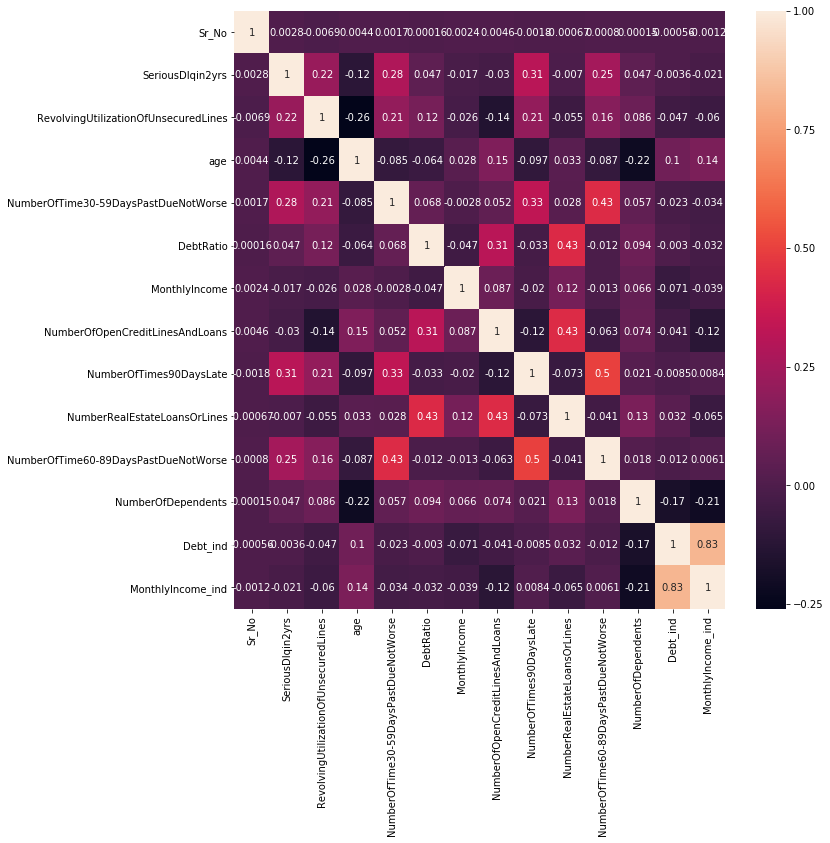

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = loans.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, annot=True, fmt=".2g")
plt.show()

**Findings** :  

* The NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines features are somehow correlated to each other. 
* NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse are correlated with each other.


#### Prepare Data for Analysis

* Now data exploration and data cleaning part is done. 
* We can go for model building part but before going into model building first we are checking vif values for all variable if VIF values is more than 5 then we will drop that variable for model building. 
* If  VIF value is more than 5 that indicates multicollinearity in the variables. That means that variable shares information with other independent variable so for building a model with those two variable is sufficient with building a model with one variable.

So, first we will check VIF value of all variable and then go for model building. 

In [0]:
import statsmodels.formula.api as sm 

In [0]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [0]:
vif_cal(input_data=loans, dependent_col="SeriousDlqin2yrs")

Sr_No  VIF =  1.0
RevolvingUtilizationOfUnsecuredLines  VIF =  1.18
age  VIF =  1.16
NumberOfTime30-59DaysPastDueNotWorse  VIF =  1.31
DebtRatio  VIF =  1.33
MonthlyIncome  VIF =  1.04
NumberOfOpenCreditLinesAndLoans  VIF =  1.37
NumberOfTimes90DaysLate  VIF =  1.4
NumberRealEstateLoansOrLines  VIF =  1.46
NumberOfTime60-89DaysPastDueNotWorse  VIF =  1.5
NumberOfDependents  VIF =  1.11
Debt_ind  VIF =  3.28
MonthlyIncome_ind  VIF =  3.37


* Vif value of all variable is less than 5 so there is no multicollinearity in variables now, for building a model we will use all variables.

### Model Building

* Now our goal is to build a model that will be predict about future to make business decision easier.

* But how we will decide a model is predicting well, So for that we split our dataset into two parts basically training dataset and test dataset. 
*  On training dataset we will fit the model and and we will evaluate on test dataset.

**Training Dataset:** The sample of data used to fit the model. The actual dataset that we use to train the model, model learns from this dataset.

**Test Dataset:** The sample of data used to provide an evaluation of a final model fit on the training dataset. It is only used once a model is completely trained.

**Model Validation:** Model Validation is nothing but checking how good is our model. we have used measures like Confusion Matrix and Accuracy.


**Sensitivity and Specificity**

* Sensitivity and Specificity of a classification problem are derived from Confusion Matrix.

  * Sensitivity is defined as Percentage of positives that are successfully classified as positive.
  *  Specificity is defined as Percentage of negatives that are successfully classified as negatives.
    
  *  Accuracy = (True Positive +True Negative)/(True Positive +False Positive + False Negative + True Neagtive)
    
  * Sensitivity = True Positive / (True Postive + False Negative)
    
  * Specificity = True Neagtive / (False Postive + True Negative)



**ROC - AUC Curve**

 1. ROC(Receiver operating characteristic) curve is drawn by taking False positive rate on X-axis and True positive rate on Y- axis.ROC tells us how many mistakes are we making to identify all the positives? 

2. We would like to make very minimal mistakes for identifying maximum positives.

3. We want that curve to be far away from straight line
Ideally we want the area under the curve as high as possible.
4. We want to make almost 0% mistakes while identifying all the positives, which means we want to see AUC value near to 1

So, In our case our goal is Build a model which identify default (bad customer ) correctly. In our dataset variable SeriousDlqin2yrs have two values 0 and 1. 0 represents a good customer which are not defaulters i.e they pay back loan and 1 represent a bad customers which are defaulters i.e they are not paying back loan. So our goal is to predict more 1 correctly. If we wrongly reject a good customer, our loss is very less compared to giving a loan to a bad customer. We don’t really worry about the good customers here, they are not harmful. So in our case we have to predict defaulter more accurately.

So here,

* True Positive - Actual customer is good and model is predicting them as good.

* True Negative - Actual customer is bad and model is predicting them as bad.

* False Postive - Actual customer is good and model is predicting them as bad.

* False Negative - Actual customer is bad and model is predicting them as good.

So in this case Specificity should be high with accuracy.


* We divide our dataset in two different variable, In X there is all column variable of loans dataset except SeriousDlqin2yrs as SeriousDlqin2yrs is our target variable so SeriousDlqin2yrs is in Y.

In [0]:
import numpy as np
features = list(loans.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans[features]
Y = loans['SeriousDlqin2yrs']

In [0]:
X.shape

(150000, 12)

In [0]:
Y = Y.astype('int')

* StandardScaler we will used for standardize our training dataset and test dataset. We will import LogisticRegression for building a logistic regression and train_test_split for spliting our dataset into two part mainly training dataset and test dataset. Importing roc_curve, roc_auc_score  from sklearn to find roc and auc then we will find accuracy on training dataset and on test dataset

* The dependent variable SeriousDlqin2yrs is binary. We have multiple
predictors RevolvingUtilizationOfUnsecuredLines, NumberOfTime30-59DaysPastDueNotWorse, age, NumberOfTime60-89DaysPastDueNotWorse etc. So here we, Build a model to predict the chance of default of customer a given customer
using all the features.

* We build a multiple logistic regression from summary we will look a p-value of all variable. Basically p-value tells about the significance of each variable. If p-value is less than 5% that is more significance variable, So if p-value is greater that 5% then we will drop that variable and again build a model. Droping that variable wil not impact on model beacuse that variable is less impactfull.

### 1. Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict 
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.preprocessing import StandardScaler

In [0]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
#scaler = StandardScaler().fit(X_train)

#X_train_scaled = scaler.transform(X_train) 
#X_test_scaled = scaler.transform(X_test)
X_train.dtypes
y_train.dtypes
y_test.dtypes

dtype('int64')

In [0]:
model = sm.Logit(y_train, X_train)
fitted = model.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.197372
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               135000
Model:                          Logit   Df Residuals:                   134987
Method:                           MLE   Df Model:                           12
Date:                Wed, 26 Jun 2019   Pseudo R-squ.:                  0.1965
Time:                        05:38:47   Log-Likelihood:                -26645.
converged:                       True   LL-Null:                       -33160.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9823      0.058    -51.629      0.000      -3.095      -2.869
RevolvingUtilizationOfUnsecuredLines     1.5206      0.034     44.092      0.000       1.453       1.588
age                                     -0.0197      0.001    -20.362      0.000      -0.022      -0.018
NumberOfTime30-59DaysPastDueNotWorse     0.4627      0.012     40.151      0.000       0.440       0.485
DebtRatio                                0.5363      0.068      7.915      0.000       0.403       0.669
MonthlyIncome                        -1.609e-05   3.37e-06     -4.775      0.000   -2.27e-05   -9.49e-06
NumberOfOpenCreditLinesAndLoans          0.0118      0.003      4.181      0.000       0.006       0.017
NumberOfTimes90DaysLate                  0.6520      0.017     38.968      0.000       0.619       0.685
NumberRealEstateLoansOrLines             0.0297      0.013      2.358      0.018       0.005       0.054
NumberOfTime60-89DaysPastDueNotWorse     0.3680      0.024     15.658      0.000       0.322       0.414
NumberOfDependents                       0.0541      0.010      5.219      0.000       0.034       0.074
Debt_ind                                 0.3713      0.048      7.692      0.000       0.277       0.466
MonthlyIncome_ind                       -0.3851      0.054     -7.136      0.000      -0.491      -0.279
========================================================================================================
"""

* 'P' values of  all varible is less than 5% . So we can't drop any varaible and go for accuracy and confusion matrix


In [0]:
predict1 = fitted.predict(X_train)

* All predict1 value are in decimal so using threshold we classify into class 0 and class 1. 
* Class 0 represent a non-default customer and class 1 represent default customer.

In [0]:
threshold = 0.5
predicted_class1 = predict1*0
predicted_class1[predict1>threshold]=1
predicted_class1.head()

101940    0.0
147932    0.0
143314    0.0
44183     0.0
99460     1.0
dtype: float64

#### Confusion Matrix on training  dataset

In [0]:
from sklearn.metrics import confusion_matrix as cm
conf_mat = cm(y_train,predicted_class1)
conf_mat

array([[125180,    801],
       [  7856,   1163]])

In [0]:
Accuracy_train = (conf_mat[0,0]+conf_mat[1,1])/sum(sum(conf_mat))
print('Accuracy on training data is ',Accuracy_train)
Error_train = 1-Accuracy_train
print('Training error is ',Error_train)
sensitivity_train = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Sensitivity of train data is : ', sensitivity_train )
specificity_train = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
print('Specificity of train data is : ', specificity_train)

Accuracy on training data is  0.9358740740740741
Training error is  0.06412592592592592
Sensitivity of train data is :  0.993641898381502
Specificity of train data is :  0.12894999445614813


#### Area Under  Curve - AUC Curve on training dataset

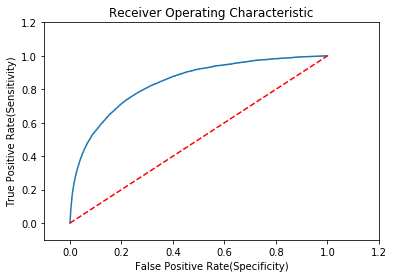

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predict1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
predict2 = fitted.predict(X_test)

In [0]:
threshold = 0.5
predicted_class2 = predict2*0
predicted_class2[predict2>threshold]=1
predicted_class2.head()

147049    0.0
74349     0.0
80045     0.0
105193    0.0
83838     0.0
dtype: float64

#### Confusion Matrix on test dataset

In [0]:
conf_mat1 = cm(y_test,predicted_class2)
conf_mat1

array([[13912,    81],
       [  876,   131]])

In [0]:
Accuracy_test = (conf_mat1[0,0]+conf_mat1[1,1])/sum(sum(conf_mat1))
print('Accuracy on test data is ',Accuracy_test)
Error_test = 1-Accuracy_test
print('Training error is ',Error_test)
sensitivity_test = conf_mat1[0,0]/(conf_mat1[0,0]+conf_mat1[0,1])
print('Sensitivity of test data is : ', sensitivity_test )
specificity_test = conf_mat1[1,1]/(conf_mat1[1,0]+conf_mat1[1,1])
print('Specificity of test data is : ', specificity_test)

Accuracy on test data is  0.9362
Training error is  0.06379999999999997
Sensitivity of test data is :  0.9942113914099907
Specificity of test data is :  0.1300893743793446


#### Area Under  Curve - AUC Curve on test dataset

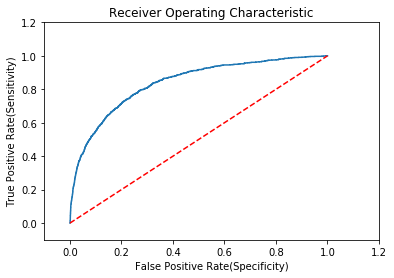

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict2 )
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

Here after building Logistic regression model we get accuracy and sensitivity and specificity :

**On training data :**

* Accuracy on training data is   : 0.9358740740740741

* Training error is                             : 0.06412592592592592

* Sensitivity of train data              :  0.993641898381502

* Specificity of train data              :  0.12894999445614813

**On test data :**

 * Accuracy on test data is            : 0.9362

* Test error is                                       : 0.06379999999999997

* Sensitivity of test data                :  0.9942113914099907

* Specificity of test data                 :  0.1300893743793446



But, here we are getting high sensitivity and low specificity and in our problem statement we have to identify deafulter more accurately so specificity should high. it is because in our dataset we have good customer counts 139974 and bad customer are 10026. So as number of good customer in our dataset is more so good customer are training and tested more time , therefore in our case we are getting sensitivity is high. But our goal is to predict bad customer correctly more that is specificity should high. For that We increase counts of bad customer. So now we will used upsampling using class_weight  balanced to increase our specificity.

In [0]:
logistic=LogisticRegression(class_weight='balanced')
fit1=logistic.fit(X_train,y_train)
predicted_train=fit1.predict(X_train)

#### Confusion matrix and accuracy on training dataset

In [0]:
threshold = 0.5
predicted_class_train = predicted_train*0
predicted_class_train[predicted_train>threshold]=1

In [0]:
from sklearn.metrics import confusion_matrix as cm
confusion_mat = cm(y_train, predicted_class_train)
Accuracy_train = (confusion_mat[0,0]+confusion_mat[1,1])/sum(sum(confusion_mat))
print('Accuracy on train data is ',Accuracy_train)
Error_train = 1-Accuracy_train
print('Train error is ',Error_train)
sensitivity_train = confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[0,1])
print('Sensitivity of train data : ', sensitivity_train )
specificity_train = confusion_mat[1,1]/(confusion_mat[1,0]+confusion_mat[1,1])
print('Specificity of train data : ', specificity_train)

Accuracy on train data is  0.8062444444444444
Train error is  0.19375555555555557
Sensitivity of train data :  0.8126884621488653
Specificity of train data :  0.7158129175946548


Area Under Curve - AUC Curve on training dataset

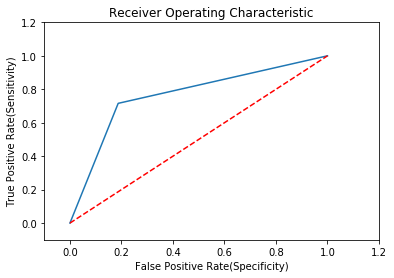

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predicted_train)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)


Auc_score : 0.76425068987176


#### Confusion matrix and accuracy on test dataset

In [0]:
predicted_test=fit1.predict(X_test)
threshold = 0.5
predicted_class_test = predicted_test*0
predicted_class_test[predicted_test>threshold]=1

In [0]:
confusion_mat = cm(y_test, predicted_class_test)
Accuracy_test = (confusion_mat[0,0]+confusion_mat[1,1])/sum(sum(confusion_mat))
print('Accuracy on test data is ',Accuracy_test)
Error_test = 1-Accuracy_test
print('Test error is ',Error_test)
sensitivity_test = confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[0,1])
print('Sensitivity of test data : ', sensitivity_test )
specificity_test = confusion_mat[1,1]/(confusion_mat[1,0]+confusion_mat[1,1])
print('Specificity of test data : ', specificity_test)

Accuracy on test data is  0.8068
Test error is  0.19320000000000004
Sensitivity of test data :  0.8133868424824423
Specificity of test data :  0.7189292543021033


#### Area Under Curve - AUC Curve on test dataset

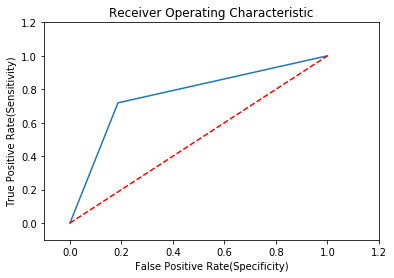

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_test )
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7661580483922728


So after Upsampling we get,

**On training data :**

* Accuracy on train data is:  0.805762962962963

* Train error is:  0.19423703703703699

* Sensitivity of train data :  0.8121289564748088

* Specificity of train data :  0.7166814749000444

* Auc_score : 0.76425068987176

**On test data :**

* Accuracy on test data is  0.8068666666666666

* Test error is  0.19313333333333338

* Sensitivity of test data :  0.8137072542566891

* Specificity of test data :  0.713307240704501

* Auc_score : 0.7661580483922728

Now, it is good model.

### 2. Decision Trees

In [0]:
loans.shape

(150000, 14)

In [0]:
from sklearn.model_selection import train_test_split, cross_val_predict 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [0]:
import numpy as np
features = list(loans.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans[features]
Y = loans['SeriousDlqin2yrs']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)

* Here we are fitting a model without giving any hyper parameters. So algorthim takes by default.

In [0]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from IPython import display
from sklearn import datasets, utils, tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
import pydotplus
from pydotplus import graph_from_dot_data
import graphviz

In [0]:
dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data,feature_names = features,filled=True, rounded=True,impurity=False)

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display.Image(graph.create_png())

#### Prediction on train dataset

In [0]:
predict1 = clf.predict(X_train)
predict1

array([0, 0, 0, ..., 0, 0, 0])

#### confusion matrix and accuracy  on training dataset

In [0]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_train,predict1)
print('Confusion matrix is \n',cm1)
total=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total
print('Accuracy on training data is ',accuracy1)
sensitivity_training = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity of training data : ', sensitivity_training )
specificity_training = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity of training data : ', specificity_training)

Confusion matrix is 
 [[125986      9]
 [   117   8888]]
Accuracy on training data is  0.9990666666666667
Sensitivity of training data :  0.9999285685939918
Specificity of training data :  0.9870072182121044


#### confusion matrix and accuracy on test dataset

In [0]:
predict_test = clf.predict(X_test)
cm2 = confusion_matrix(y_test,predict_test)
print(cm2)
accuracy_test = (cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print('Accuracy on test data is ',accuracy_test)
sensitivity_test = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity of test data : ', sensitivity_test )
specificity_test = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity of test data : ', specificity_test)

[[13174   805]
 [  747   274]]
Accuracy on test data is  0.8965333333333333
Sensitivity of test data :  0.9424136204306459
Specificity of test data :  0.2683643486777669


#### Model using grid search method

* Here  without using any hyper-parameters , we are getting almost 100% accuracy on training dataset that means algorthim increase the model complexity. So reduce model complexity  we use grid Search method. 


So now **prune** the tree using grid search method

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score


# search parameters
param_grid = {'max_depth' : [8, 10, 12,16], 'min_samples_split' : [2, 5,8,10]}

#Scores to be evaluated
scoring = {'Specificity': make_scorer(recall_score, pos_label =0), 'Accuracy': make_scorer(accuracy_score),'Sensitivity':'recall'}
#scores_dict = {'Accuracy':'accuracy', 'Sensitivity':'recall'}

#Default parameters for model
params = {'class_weight': 'balanced'}

#Cross validation object
outer_cv = KFold(n_splits=15, shuffle=True, random_state=5)

#grid search model
clf = GridSearchCV(DecisionTreeClassifier(**params),
                   param_grid, scoring=scoring, refit ='Accuracy', cv=outer_cv)
clf.fit(X_train,y_train)

# print ('train accuracy', clf_score1)
print("Best estimator found by grid search:",clf.best_estimator_)
# print('Score:', clf_score)
print('Best Score :',clf.best_score_)




Best estimator found by grid search: DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best Score : 0.8135851851851852


In [0]:
# clf.cv_results_
pd.DataFrame(clf.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,0.627379,0.617823,0.619225,0.618041,0.737231,0.734613,0.733244,0.735111,0.843484,0.84308,0.844887,0.844408,1.01405,1.01229,1.01565,1.07943
std_fit_time,0.00922676,0.00551165,0.00501287,0.0068677,0.00500496,0.00916058,0.00613684,0.00551545,0.00910314,0.00783552,0.00702338,0.00805291,0.00809658,0.00763049,0.00781449,0.2182
mean_score_time,0.0127332,0.0127713,0.0124987,0.012215,0.0127279,0.0127616,0.0124599,0.0125286,0.0133094,0.0132604,0.0130372,0.0133335,0.0141546,0.0141866,0.014348,0.0144803
std_score_time,0.000670385,0.00109063,0.00054194,0.00037975,0.000529349,0.000969703,0.000538397,0.000386092,0.000832481,0.00049952,0.000363756,0.00136772,0.000244553,0.000315965,0.000939004,0.000781124
param_max_depth,8,8,8,8,10,10,10,10,12,12,12,12,16,16,16,16
param_min_samples_split,2,5,8,10,2,5,8,10,2,5,8,10,2,5,8,10
params,"{'max_depth': 8, 'min_samples_split': 2}","{'max_depth': 8, 'min_samples_split': 5}","{'max_depth': 8, 'min_samples_split': 8}","{'max_depth': 8, 'min_samples_split': 10}","{'max_depth': 10, 'min_samples_split': 2}","{'max_depth': 10, 'min_samples_split': 5}","{'max_depth': 10, 'min_samples_split': 8}","{'max_depth': 10, 'min_samples_split': 10}","{'max_depth': 12, 'min_samples_split': 2}","{'max_depth': 12, 'min_samples_split': 5}","{'max_depth': 12, 'min_samples_split': 8}","{'max_depth': 12, 'min_samples_split': 10}","{'max_depth': 16, 'min_samples_split': 2}","{'max_depth': 16, 'min_samples_split': 5}","{'max_depth': 16, 'min_samples_split': 8}","{'max_depth': 16, 'min_samples_split': 10}"
split0_test_Specificity,0.766203,0.766203,0.766203,0.766322,0.789273,0.789154,0.789154,0.789154,0.801403,0.801403,0.801998,0.801165,0.837436,0.836128,0.833512,0.830301
split1_test_Specificity,0.783157,0.783276,0.783276,0.783157,0.780421,0.780064,0.780064,0.780064,0.807898,0.807303,0.807422,0.807066,0.828238,0.824908,0.824194,0.822053
split2_test_Specificity,0.79383,0.793711,0.79383,0.793592,0.790257,0.790019,0.789424,0.789304,0.802049,0.802644,0.801334,0.800619,0.828728,0.828132,0.824202,0.821343


#### Conclusion :

In tree decision tree we get best scor0.813585 	 with specificity is 0.828623 by maximum deapth 16, min_samples_leaf=1 and min_samples_split=2.
So now using these hyperparameters we build a model again and calculate accuracy , confusion matrix and auc-roc curve.

By trial - error method

In [0]:
clf = tree.DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predict1 = clf.predict(X_train)
predict1

array([0, 0, 0, ..., 0, 0, 0])

#### Confusion matrix and accuracy on training dataset

In [0]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_train,predict1)
print('Confusion matrix is \n',cm1)
total=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total
print('Accuracy on training data is ',accuracy1)
sensitivity_training = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity of training data : ', sensitivity_training)
specificity_training = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity of training data : ', specificity_training)

Confusion matrix is 
 [[97365 28622]
 [ 1712  7301]]
Accuracy on training data is  0.7753037037037037
Sensitivity of training data :  0.7728178304110742
Specificity of training data :  0.8100521468989238


Area Under Curve - AUC Curve on training dataset

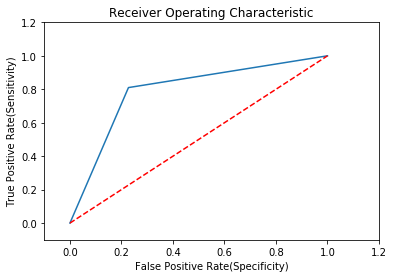

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predict1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7914349886549992


#### Confusion matrix and accuracy on test dataset

In [0]:
predict_test = clf.predict(X_test)
cm2 = confusion_matrix(y_test,predict_test)
print(cm2)
accuracy_test = (cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print('Accuracy on test data is ',accuracy_test)
sensitivity_test = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity of test data : ', sensitivity_test )
specificity_test = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity of test data : ', specificity_test)

[[10780  3207]
 [  243   770]]
Accuracy on test data is  0.77
Sensitivity of test data :  0.7707156645456495
Specificity of test data :  0.7601184600197434


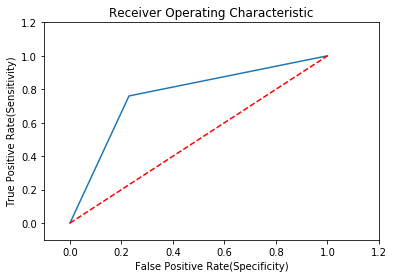

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_test)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7654170622826966


**Results**:

**On training data :**

* Accuracy on training data : 0.7753037037037037

* Sensitivity of training data :  0.7728178304110742

* Specificity of training data :  0.8100521468989238

* Auc_score : 0.7914349886549992

**On test data :**

* Accuracy on test data : 0.77

* Sensitivity of test data :  0.7707156645456495

* Specificity of test data :  0.7654170622826966

* Auc_score : 0.7654170622826966

### Neural Network

Neural netwoprk Process  basically work in 5 step :

Step 1: Randomly  Initialized the weights

Step 2: In Training & Activation we  Input the training values and perform the   forward calculations.

Step 3: After forward  calculation we  calculate  error calculation. Error at the outputs. Use the output error to calculate error fractions at each hidden layer.

Step 4: Update the weights to reduce the error, recalculate and repeat the process of training & updating the weights for all the examples.

Step 5: Stop the training and weights updating process when the minimum error criteria is met.

In neural network there is no option for upsampling like class_weight  = balanced. So before building a neural network model we manually do upsampling.

Checking the number of  good customer and bad customer in the dataset

In [0]:
loans["SeriousDlqin2yrs"].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

* Using .loc code we can find the location of default customers and stored in defaulter_customer

In [0]:
defaulter_customer = loans.loc[loans["SeriousDlqin2yrs"] == 1]
print(len(defaulter_customer))
defaulter_customer.head()

10026


,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt_ind,MonthlyIncome_ind
0,1,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2.0,0,0
13,14,1,0.964673,40.0,3,0.382965,13700.0,9,3,1,1,2.0,0,0
21,22,1,0.025656,38.0,0,0.475841,3000.0,7,0,1,0,2.0,0,0
25,26,1,0.392248,50.0,0,0.301629,4676.0,14,0,3,0,1.0,1,0
51,52,1,0.728150,31.0,0,0.824725,3000.0,10,0,2,0,1.0,0,0


In [0]:
s = sum(loans["SeriousDlqin2yrs"]==0)
t = sum(loans["SeriousDlqin2yrs"]==1)
print(s)
print(t)
s/t

139974
10026


13.961101137043686

In [0]:
loans1 = loans
for i in range(int(s/t)-1):
  loans1 = loans1.append(defaulter_customer)

Now, in loans1 defaulter and non-defaulter customer have same weights.

In [0]:
loans1["SeriousDlqin2yrs"].value_counts()

0    139974
1    130338
Name: SeriousDlqin2yrs, dtype: int64

for a building a neural network we have to install neurolab

In [0]:
pip install neurolab

     |████████████████████████████████| 655kB 45.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


In [0]:
import neurolab as nl
import numpy as np
import pylab as pl

In [0]:
loans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270312 entries, 0 to 149979
Data columns (total 14 columns):
Sr_No                                   270312 non-null int64
SeriousDlqin2yrs                        270312 non-null int64
RevolvingUtilizationOfUnsecuredLines    270312 non-null float64
age                                     270312 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    270312 non-null int64
DebtRatio                               270312 non-null float64
MonthlyIncome                           270312 non-null float64
NumberOfOpenCreditLinesAndLoans         270312 non-null int64
NumberOfTimes90DaysLate                 270312 non-null int64
NumberRealEstateLoansOrLines            270312 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    270312 non-null int64
NumberOfDependents                      270312 non-null float64
Debt_ind                                270312 non-null int64
MonthlyIncome_ind                       270312 non-null int64
dtypes: flo

* So, now we build neural network model on loans1 dataset. Again from loans1 dataset we create X and Y, then using X and Y we split the dataset in training set and test set.

In [0]:
import numpy as np
features = list(loans1.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans1[features]
Y = loans1['SeriousDlqin2yrs']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

* This function will calculate the minimum and maximum value for every columns.

In [0]:
def minMax(x):
  return pd.Series(index=['min','max'],data=[x.min(),x.max()])

* Using minMax function here we calculated minimum and maximum.

In [0]:
listvalues = X_train_scaled.apply(minMax).T.values.tolist()
listvalues

[[-1.1274347574998569, 1.530622865977337],
 [-1.9854858275514597, 4.152661166231091],
 [-0.5077107194041048, 10.383380349869382],
 [-1.522017469356918, 3.258641497236427],
 [-0.5735486319025994, 284.91962277433794],
 [-1.5220554793123047, 9.243319640382234],
 [-0.35691861154410265, 15.328234048955718],
 [-0.7896930949949196, 41.667173731223556],
 [-0.31002387911696394, 12.657289381703995],
 [-0.710263634515315, 16.52293126960475],
 [-0.5492155750911653, 1.8207786620654531],
 [-0.47480269830434674, 2.106137988624074]]

#### Model with 15 hidden layer and 200 epoch size

* Neural network building part :  Start with some random initialization and  give the input for forward calculation and calculated time 

In [0]:
# Create network with 1 layer and random initialized
error = []

In [0]:
net = nl.net.newff(listvalues,[15,1],transf=[nl.trans.LogSig()] * 2)
net.trainf = nl.train.train_rprop 

In [0]:
import time
start_time = time.time()
error.append(net.train(X_train_scaled, y_train, show=0, epochs = 200,goal=0.02))
print("--- %s seconds ---" % (time.time() - start_time))

--- 2682.5933532714844 seconds ---


#### Confusion matrix and accuracy on training dataset

In [0]:
predicted_values = net.sim(X_train_scaled.as_matrix())
predicted_values

array([[0.93855181],
       [0.41049325],
       [0.06253596],
       ...,
       [0.97845968],
       [0.48880772],
       [0.69908299]])

In [0]:
threshold = 0.5
predicted_class = predicted_values
predicted_class[predicted_values>threshold] = 1
predicted_class[predicted_values<=threshold] = 0

*  Confusion matrix and accuracy on training dataset, sensitivity , specificity and auc_score.


In [0]:
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(y_train,predicted_class)
print('Confusion matrix \n :',ConfusionMatrix)
accuracy = np.trace(ConfusionMatrix)/sum(sum(ConfusionMatrix))
print('Accuracy on training data :',accuracy)
error = 1-accuracy
print(error)
sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
print('Sensitivity on training data is',sensitivity)
specificity_train = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
print('Specificity of training data : ', specificity_train)

Confusion matrix 
 : [[101810  24231]
 [ 28322  88917]]
Accuracy on training data : 0.7839814205853338
0.21601857941466618
Sensitivity on training data is 0.8077530327433137
Specificity of training data :  0.7584250974505071


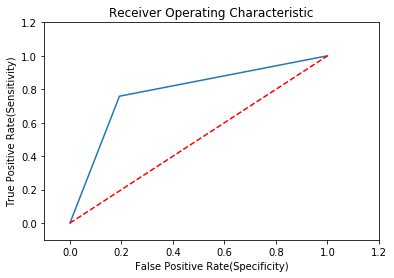

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predicted_values)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7830890650969103


#### confusion matrix and accuracy on test dataset

In [0]:
predicted_values1 = net.sim(X_test_scaled.as_matrix())
predicted_values1

array([[0.13148391],
       [0.96671084],
       [0.56164539],
       ...,
       [0.79302581],
       [0.58110211],
       [0.05886425]])

In [0]:
threshold = 0.5
predicted_class1 = predicted_values1
predicted_class1[predicted_values1>threshold] = 1
predicted_class1[predicted_values1<=threshold] = 0

* Confusion matrix and accuracy on test dataset, sensitivity, specificity and auc_score

In [0]:
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(y_test,predicted_class1)
print('Confusion matrix :',ConfusionMatrix)
accuracy = np.trace(ConfusionMatrix)/sum(sum(ConfusionMatrix))
print('Accuracy on test data :',accuracy)
error = 1-accuracy
print(error)
sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
print('Sensitivity on test data is',sensitivity)
specificity_test = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
print('Specificity of test data : ', specificity_test)

Confusion matrix : [[11331  2602]
 [ 3255  9844]]
Accuracy on test data : 0.7833308671204499
0.21666913287955014
Sensitivity on test data is 0.8132491207923634
Specificity of test data :  0.7515077486831055


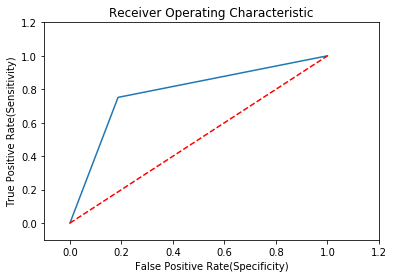

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7823784347377344


#### Model with 12 hidden layer and 300 epoch size

Here, we done the same things as above with 12 hidden layer and 300 epoch size

In [0]:
# Create network with 1 layer and random initialized
error1 = []

In [0]:
net1 = nl.net.newff(listvalues,[12,1],transf=[nl.trans.LogSig()] * 2)
net1.trainf = nl.train.train_rprop 

In [0]:
print(net1.ci) # number of input variables
print(net1.co) # number of output variable
print(len(net1.layers))

12
1
2


In [0]:
import time
start_time = time.time()
error1.append(net1.train(X_train_scaled, y_train, show=0, epochs = 300,goal=0.02))
print("--- %s seconds ---" % (time.time() - start_time))

--- 3979.504704475403 seconds ---


#### Confusion matrix and accuracy on training dataset

In [0]:
predicted_values = net1.sim(X_train_scaled.as_matrix())
predicted_values

array([[0.92833659],
       [0.44142323],
       [0.11102062],
       ...,
       [0.9214803 ],
       [0.46244817],
       [0.80000952]])

In [0]:
threshold = 0.5
predicted_class = predicted_values
predicted_class[predicted_values>threshold] = 1
predicted_class[predicted_values<=threshold] = 0

In [0]:
from sklearn.metrics import confusion_matrix as cm
Confusion_Matrix = cm(y_train,predicted_class)
print('Confusion matrix :',Confusion_Matrix)
accuracy = np.trace(Confusion_Matrix)/sum(sum(Confusion_Matrix))
print('Accuracy on training data :',accuracy)
error = 1-accuracy
print(error)
sensitivity = Confusion_Matrix[0,0]/(Confusion_Matrix[0,0]+Confusion_Matrix[0,1])
print('Sensitivity on training data is',sensitivity)
specificity_train = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
print('Specificity of training data : ', specificity_train)

Confusion matrix : [[101531  24510]
 [ 27919  89320]]
Accuracy on training data : 0.7844911213416639
0.21550887865833612
Sensitivity on training data is 0.8055394673161907
Specificity of training data :  0.7515077486831055


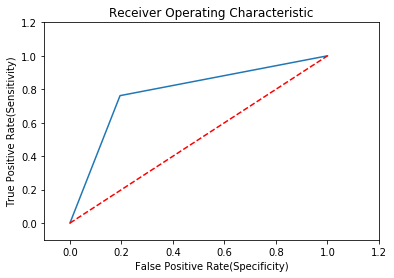

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predicted_values)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7837009937336675


#### Confusion matrix and accuracy on test dataset

In [0]:
predicted_values1 = net1.sim(X_test_scaled.as_matrix())
predicted_values1

array([[0.14329824],
       [0.96799443],
       [0.58697753],
       ...,
       [0.90515489],
       [0.59345452],
       [0.07363384]])

In [0]:
threshold = 0.5
predicted_class1 = predicted_values1
predicted_class1[predicted_values1>threshold] = 1
predicted_class1[predicted_values1<=threshold] = 0

In [0]:
from sklearn.metrics import confusion_matrix as cm
Confusion_Matrix = cm(y_test,predicted_class1)
print('Confusion matrix :',Confusion_Matrix)
accuracy = np.trace(Confusion_Matrix)/sum(sum(Confusion_Matrix))
print('Accuracy on test data :',accuracy)
error = 1-accuracy
print(error)
sensitivity = Confusion_Matrix[0,0]/(Confusion_Matrix[0,0]+Confusion_Matrix[0,1])
print('Sensitivity on test data is',sensitivity)
specificity_test = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
print('Specificity of test data : ', specificity_test)

Confusion matrix : [[11322  2611]
 [ 3203  9896]]
Accuracy on test data : 0.7849215744303049
0.21507842556969514
Sensitivity on test data is 0.8126031723246968
Specificity of test data :  0.7515077486831055


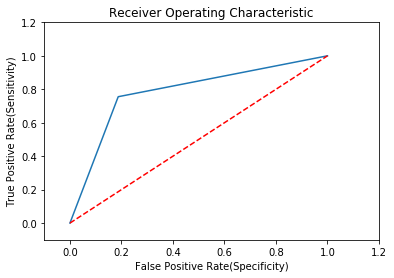

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7840403448462173


**For 15 - hidden layers & 200 Epochs:**

**On training data** :

* Accuracy on training data :  0.7839814205853338

* Sensitivity on training data : 0.8077530327433137

* Specificity of training data :  0.7584250974505071

* Auc_score : 0.7830890650969103

**On test data :**
* Accuracy on test data : 0.7833308671204499 

* Sensitivity on test data : 0.8132491207923634

* Specificity of test data :  0.7515077486831055

* Auc_score : 0.7823784347377344

**For 12 - hidden layers &  300 Epochs**

**On training data** :

* Accuracy on training data : 0.7844911213416639

* Sensitivity on training data : 0.8055394673161907

* Specificity of training data :  0.7515077486831055

* Auc_score : 0.7837009937336675

**On test data :**

* Accuracy on test data : 0.7849215744303049

* Sensitivity on test data : 0.8126031723246968

* Specificity of test data :  0.7515077486831055

* Auc_score : 0.7840403448462173

### Support Vector Machine (SVM)

* A support vector machine takes data points and outputs the hyperplane (which in n- dimensions, where  n is number of independent variable ) that best separates the outputs. In  our case outputs is whether customer is default or non-default. 
* That line is the decision boundary: anything that falls to one side of it we will classify as Defaulter, and anything that falls to the other as non-defaulter.

In [0]:
loans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270312 entries, 0 to 149979
Data columns (total 14 columns):
Sr_No                                   270312 non-null int64
SeriousDlqin2yrs                        270312 non-null int64
RevolvingUtilizationOfUnsecuredLines    270312 non-null float64
age                                     270312 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    270312 non-null int64
DebtRatio                               270312 non-null float64
MonthlyIncome                           270312 non-null float64
NumberOfOpenCreditLinesAndLoans         270312 non-null int64
NumberOfTimes90DaysLate                 270312 non-null int64
NumberRealEstateLoansOrLines            270312 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    270312 non-null int64
NumberOfDependents                      270312 non-null float64
Debt_ind                                270312 non-null int64
MonthlyIncome_ind                       270312 non-null int64
dtypes: flo

In [0]:
from sklearn import svm
import numpy as np

In [0]:
features = list(loans.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans[features]
Y = loans['SeriousDlqin2yrs']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

#### SVM model with linear kernel

* First we are building a model using linear kernel

In [0]:
import time
start_time = time.time()
svm1 = svm.SVC(kernel = 'linear').fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2269.3694586753845 seconds ---


#### Confusion matrix  and accuracy on training dataset

In [0]:
from sklearn.metrics import confusion_matrix as cm
predict_train = svm1.predict(X_train_scaled)
confusion_matrix_train = cm(y_train,predict_train)
print('Confusion Matrix:\n',confusion_matrix_train)

Confusion Matrix:
 [[105144  20922]
 [ 36262  80952]]


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
Accuracy_training = accuracy_score(y_train,predict_train)
print('Accuracy on training data is',Accuracy_training)
sensitivity = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print('Sensitivity on trainig data is',sensitivity)
specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print('Specificity of train data : ', specificity_train)

Accuracy on training data is 0.7649457415323907
Sensitivity on trainig data is 0.8340393127409452
Specificity of train data :  0.6906342245806815


#### Confusion matrix  and accuracy on test dataset

In [0]:
predict_test = svm1.predict(X_test_scaled)
confusion_matrix_test = cm(y_test,predict_test)
print('Confusion Matrix:\n',confusion_matrix_test)

Confusion Matrix:
 [[11595  2313]
 [ 4051  9073]]


In [0]:
Accuracy_test = accuracy_score(y_test,predict_test)
print('Accuracy on test data is',Accuracy_test)
sensitivity = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity on test data is',sensitivity)
specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity of test data : ', specificity_test)

Accuracy on test data is 0.764575318141462
Sensitivity on test data is 0.8336928386540121
Specificity of test data :  0.6913288631514782


#### SVM model with rbf kernel

model building withrbf kernel

In [0]:
import time
start_time = time.time()
svm2 = svm.SVC(kernel='rbf',C =1, gamma = 'scale').fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3277.9370975494385 seconds ---


In [0]:
predict_train1 = svm2.predict(X_train_scaled)
confusion_matrix_train = cm(y_train,predict_train1)
print('Confusion Matrix:\n',confusion_matrix_train)

Confusion Matrix:
 [[103499  22567]
 [ 29072  88142]]


In [0]:
Accuracy_training1 = accuracy_score(y_train,predict_train1)
print('Accuracy on training data is',Accuracy_training1)
sensitivity = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print('Sensitivity on training data is',sensitivity)
specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print('Specificity of training data : ', specificity_train)

Accuracy on training data is 0.7877384084182835
Sensitivity on training data is 0.8209905922294671
Specificity of training data :  0.7519750200487997


In [0]:
predict_test1 = svm2.predict(X_test_scaled)
confusion_matrix_test = cm(y_test,predict_test1)
print('Confusion Matrix:\n',confusion_matrix_test)

Confusion Matrix:
 [[11383  2525]
 [ 3272  9852]]


In [0]:
Accuracy_test1 = accuracy_score(y_test,predict_test1)
print('Accuracy on test data is',Accuracy_test1)
sensitivity = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity on test data is',sensitivity)
specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity of test data : ', specificity_test)

Accuracy on test data is 0.7855504587155964
Sensitivity on test data is 0.8184498130572333
Specificity of test data :  0.7506857665345931


* Data is more, so computationally support vector machine is time consuming algorthim , therefore  grid search taking lots of time. So we were taking subset of data and then apply the grid search algorithm . 
* From grid search algorithm which give best parameters we will use that parameters and build a model on whole dataset.

In [0]:
# Randomly slect 50000  rows from my loans1  data
loans1_subset = loans1.sample(n=50000)
loans1_subset.head()

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt_ind,MonthlyIncome_ind
9033,9034,0,0.382209,59.0,0,0.313593,10350.0,8,0,2,0,3.0,0,0
255,256,0,0.000000,23.0,0,0.000000,1725.0,1,0,0,0,0.0,0,0
56617,56618,0,0.001947,78.0,0,0.301629,5400.0,8,0,0,0,0.0,1,1
125603,125604,0,0.000000,73.0,0,0.197901,3430.0,11,0,0,0,0.0,0,0
145635,145636,1,1.000000,53.0,2,0.001819,4948.0,1,3,0,0,0.0,0,0


In [0]:
loans1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 9033 to 128222
Data columns (total 14 columns):
Sr_No                                   50000 non-null int64
SeriousDlqin2yrs                        50000 non-null int64
RevolvingUtilizationOfUnsecuredLines    50000 non-null float64
age                                     50000 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    50000 non-null int64
DebtRatio                               50000 non-null float64
MonthlyIncome                           50000 non-null float64
NumberOfOpenCreditLinesAndLoans         50000 non-null int64
NumberOfTimes90DaysLate                 50000 non-null int64
NumberRealEstateLoansOrLines            50000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    50000 non-null int64
NumberOfDependents                      50000 non-null float64
Debt_ind                                50000 non-null int64
MonthlyIncome_ind                       50000 non-null int64
dtypes: float64(5), int

In [0]:
loans1_subset["SeriousDlqin2yrs"].value_counts()

0    25999
1    24001
Name: SeriousDlqin2yrs, dtype: int64

In [0]:
from sklearn import svm
import numpy as np

In [0]:
features = list(loans1_subset.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans1_subset[features]
Y = loans1_subset['SeriousDlqin2yrs']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

#### Model build using Grid Search Method

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score


# search parameters
param_grid = {'C': [0.1, 0.5, 1], 'gamma': [0.1, 1]}

#Scores to be evaluated
scoring = {'Specificity': make_scorer(recall_score, pos_label =0), 'Accuracy': make_scorer(accuracy_score),'Sensitivity':'recall'}
#scores_dict = {'Accuracy':'accuracy', 'Sensitivity':'recall'}

#Default parameters for model
params = {'class_weight': 'balanced'}

#Cross validation object
outer_cv = KFold(n_splits=10, shuffle=True, random_state=5)

#grid search model
clf = GridSearchCV(svm.SVC(**params), param_grid, scoring=scoring, refit ='Accuracy', cv=outer_cv)
clf.fit(X_train_scaled,y_train)

print("Best estimator found by grid search:", clf.best_estimator_)
# print('Score:', svm_score)
print('Best Score :',clf.best_score_)

Best estimator found by grid search: SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Best Score : 0.8071777777777778


In [0]:
pd.DataFrame(clf.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,62.6609,109.494,63.9543,129.919,70.112,143.146
std_fit_time,0.313658,0.60981,0.438317,5.73028,1.31872,11.0578
mean_score_time,9.60086,11.8173,9.12241,10.489,8.97636,10.2704
std_score_time,0.0998669,0.107677,0.0859086,0.0748811,0.057438,0.0695098
param_C,0.1,0.1,0.5,0.5,1,1
param_gamma,0.1,1,0.1,1,0.1,1
params,"{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.5, 'gamma': 0.1}","{'C': 0.5, 'gamma': 1}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}"
split0_test_Specificity,0.797182,0.728864,0.802306,0.795901,0.804014,0.813834
split1_test_Specificity,0.789787,0.724255,0.797447,0.788085,0.797021,0.800851
split2_test_Specificity,0.779075,0.717683,0.78556,0.778642,0.786425,0.791613


In SVM, we get best score is 0.8071777777777778 with specificity is 0.800972 by C =1 and gamma = 1.

In [0]:
loans1.shape

(270312, 14)

* From grid search method we get best model on loans1_subset data. Now we will build svm model on whole dataset using hyperparamters C =1 and gamma = 1.

In [0]:
from sklearn import svm
import numpy as np
features = list(loans1.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans1[features]
Y = loans1['SeriousDlqin2yrs']
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [0]:
import time
start_time = time.time()
svm3 = svm.SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001,verbose=False).fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5953.346336364746 seconds ---


#### Confusion matrxi and accuracy on training dataset

In [0]:
from sklearn.metrics import confusion_matrix as cm
predict_train1 = svm3.predict(X_train_scaled)
confusion_matrix_train = cm(y_train,predict_train1)
print('Confusion Matrix:\n',confusion_matrix_train)

Confusion Matrix:
 [[113310  12705]
 [ 13215 104050]]


In [0]:
Accuracy_training1 = accuracy_score(y_train,predict_train1)
print('Accuracy on training data is',Accuracy_training1)
sensitivity = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print('Sensitivity on training data is',sensitivity)
specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print('Specificity of training data : ', specificity_train)

Accuracy on training data is 0.8934560999671161
Sensitivity on training data is 0.8991786692060469
Specificity of training data :  0.887306527949516


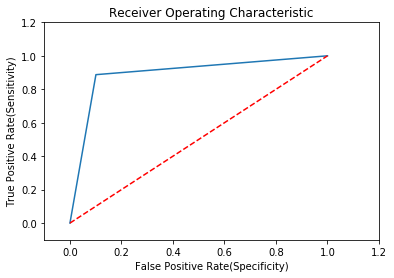

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predict_train1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.8932425985777815


#### Confusion matrix and accuracy on test dataset

In [0]:
predict_test1 = svm3.predict(X_test_scaled)
confusion_matrix_test = cm(y_test,predict_test1)
print('Confusion Matrix:\n',confusion_matrix_test)

Confusion Matrix:
 [[12174  1785]
 [ 1592 11481]]


In [0]:
Accuracy_test1 = accuracy_score(y_test,predict_test1)
print('Accuracy on test data is',Accuracy_test1)
sensitivity = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity on test data is',sensitivity)
specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity of test data : ', specificity_test)

Accuracy on test data is 0.8750739863865049
Sensitivity on test data is 0.8721255104233827
Specificity of test data :  0.8782222902164767


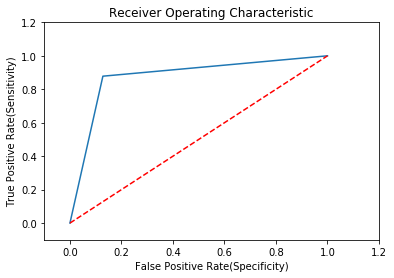

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_test1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.8751739003199297


**Results:**
 Best model using hyperparamters C =1 and gamma = 1.
 
**On training data** :
 
* Accuracy on training data : 0.8934560999671161
 
* Sensitivity on training data : 0.8991786692060469

* Specificity of training data :  0.887306527949516

* Auc_score : 0.8932425985777815
 
**On test data :**

* Accuracy on test data :  0.8750739863865049

* Sensitivity on test data : 0.8721255104233827

* Specificity of test data :  0.8782222902164767

* Auc_score : 0.8751739003199297
 
 
 
 
 

### Random Forest

* Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. 
* Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

#### Model building without giving any hyperparameters

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
features = list(loans1.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans1[features]
Y = loans1['SeriousDlqin2yrs']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [0]:
Random_forest=RandomForestClassifier()
Random_forest.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Confusion matrix and acurracy on training dataset

In [0]:
predict_training = Random_forest.predict(X_train_scaled)
predict_training

array([1, 1, 1, ..., 1, 0, 1])

In [0]:
from sklearn.metrics import confusion_matrix as cm
confusion_matrix_train = cm(y_train,predict_training)
print('Confusion Matrix:\n',confusion_matrix_train)
Accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/sum(sum(confusion_matrix_train))
print('Accuracy on training data is',Accuracy_train)
sensitivity_train =confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print('Sensitivity on training data is',sensitivity_train)
specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print('Specificity of train data : ', specificity_train)

Confusion Matrix:
 [[125606    344]
 [    10 117320]]
Accuracy on training data is 0.9985448865504768
Sensitivity on training data is 0.9972687574434299
Specificity of train data :  0.9999147703059746


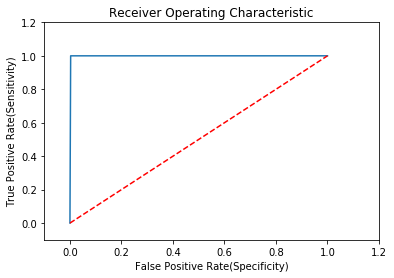

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predict_training)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.9985917638747022


#### Confusion matrix and acurracy on test dataset

In [0]:
predict_test = Random_forest.predict(X_test_scaled)
predict_test

array([0, 1, 0, ..., 1, 0, 1])

In [0]:
confusion_matrix_test = cm(y_test,predict_test)
print('Confusion Matrix:\n',confusion_matrix_test)
Accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/sum(sum(confusion_matrix_test))
print('Accuracy on test data is',Accuracy_test)
sensitivity_test =confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity on test data is',sensitivity_test)
specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity of test data : ', specificity_test)

Confusion Matrix:
 [[13660   364]
 [    3 13005]]
Accuracy on test data is 0.986423498076354
Sensitivity on test data is 0.9740444951511694
Specificity of test data :  0.9997693726937269


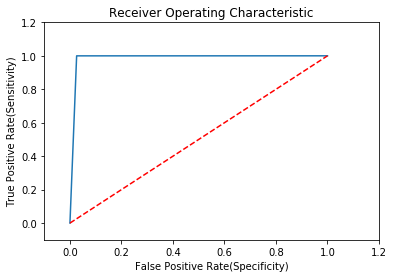

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_test)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.9869069339224482


#### Model building using grid search method

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score



# search parameters
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'max_features' : [4, 8, 'sqrt', 'log2'],               
             }

#Scores to be evaluated
scoring = {'Specificity': make_scorer(recall_score, pos_label =0), 'Accuracy': make_scorer(accuracy_score),'Sensitivity':'recall'}

#scores_dict = {'Accuracy':'accuracy', 'Sensitivity':'recall'}

#Default parameters for model
params = {'class_weight': 'balanced'}

#Cross validation object
outer_cv = KFold(n_splits=10, shuffle=True, random_state=5)

#grid search model
rf = GridSearchCV(RandomForestClassifier(**params), 
                   param_grid, scoring=scoring, refit ='Accuracy', cv=outer_cv)
rf.fit(X_train_scaled,y_train)

# print ('train accuracy', rf_score1)
print("Best estimator found by grid search:",rf.best_estimator_)
# print('Score:', rf_score)
print('Best Score :',rf.best_score_)

Best estimator found by grid search: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Best Score : 0.9849884906280829


In [0]:
pd.DataFrame(rf.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,5.29812,25.4642,49.5657,99.2915,8.80205,43.4121,86.9952,173.178,4.14053,20.2486,40.4596,80.695,4.05622,20.212,40.3875,80.4479
std_fit_time,0.0527732,0.468646,0.215214,1.08881,0.0807948,0.246537,0.671461,1.49604,0.0753897,0.0902243,0.456353,0.691274,0.0964125,0.149757,0.332845,0.314087
mean_score_time,0.230278,1.03414,1.98837,3.90751,0.208066,0.973258,1.94136,3.80918,0.214072,1.00758,1.99528,3.96784,0.213135,1.00819,1.99709,3.95638
std_score_time,0.00186823,0.0193341,0.0268665,0.033247,0.00345109,0.0113844,0.0338873,0.0468986,0.00524204,0.0163222,0.0236679,0.0484609,0.0037942,0.00737142,0.0223617,0.0283578
param_max_features,4,4,4,4,8,8,8,8,sqrt,sqrt,sqrt,sqrt,log2,log2,log2,log2
param_n_estimators,10,50,100,200,10,50,100,200,10,50,100,200,10,50,100,200
params,"{'max_features': 4, 'n_estimators': 10}","{'max_features': 4, 'n_estimators': 50}","{'max_features': 4, 'n_estimators': 100}","{'max_features': 4, 'n_estimators': 200}","{'max_features': 8, 'n_estimators': 10}","{'max_features': 8, 'n_estimators': 50}","{'max_features': 8, 'n_estimators': 100}","{'max_features': 8, 'n_estimators': 200}","{'max_features': 'sqrt', 'n_estimators': 10}","{'max_features': 'sqrt', 'n_estimators': 50}","{'max_features': 'sqrt', 'n_estimators': 100}","{'max_features': 'sqrt', 'n_estimators': 200}","{'max_features': 'log2', 'n_estimators': 10}","{'max_features': 'log2', 'n_estimators': 50}","{'max_features': 'log2', 'n_estimators': 100}","{'max_features': 'log2', 'n_estimators': 200}"
split0_test_Specificity,0.968021,0.969124,0.968809,0.967864,0.967234,0.964162,0.964635,0.965737,0.969518,0.968652,0.969675,0.969203,0.969203,0.968258,0.96936,0.969124
split1_test_Specificity,0.970414,0.969532,0.971216,0.970013,0.96873,0.967367,0.967447,0.966405,0.971777,0.971456,0.971857,0.971937,0.970494,0.970654,0.972017,0.971216
split2_test_Specificity,0.9701,0.969944,0.968926,0.969317,0.966656,0.96556,0.964543,0.966421,0.970335,0.970492,0.969631,0.970805,0.9701,0.971039,0.970022,0.970805


In Random Forest we get best score is 0.9849884906280829 with specificity is 0.971089 by max_features=sqrt and n_estimators=50.



Now we build a model using these hyperparametes max_feature = sqrt and n_estimators = 20 and calculate the accuracy , sensitivity and specificity.

* By trial-error method

In [0]:
Random_forest=RandomForestClassifier(bootstrap=True,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Random_forest.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Confusion matrix and acurracy on training dataset

In [0]:
from sklearn.metrics import confusion_matrix as cm
predict_training1 = Random_forest.predict(X_train_scaled)
print(predict_training1)
confusion_matrix_train = cm(y_train,predict_training1)
print('Confusion Matrix:\n',confusion_matrix_train)
Accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/sum(sum(confusion_matrix_train))
print('Accuracy on training data is',Accuracy_train)
sensitivity_train =confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print('Sensitivity on training data is',sensitivity_train)
specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print('Specificity of train data : ', specificity_train)

[0 0 0 ... 0 1 1]
Confusion Matrix:
 [[104288  21588]
 [ 25707  91697]]
Accuracy on training data is 0.8055943768497205
Sensitivity on training data is 0.8284978868092409
Specificity of train data :  0.7810381247657661


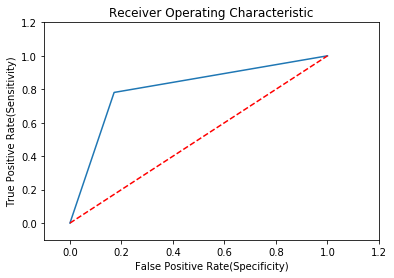

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predict_training1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.8047680057875035


#### Confusion matrix and acurracy on test dataset

In [0]:
predict_test1 = Random_forest.predict(X_test_scaled)
print(predict_test1)
confusion_matrix_test = cm(y_test,predict_test1)
print('Confusion Matrix:\n',confusion_matrix_test)
Accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/sum(sum(confusion_matrix_test))
print('Accuracy on test data is',Accuracy_test)
sensitivity_test =confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print('Sensitivity on test data is',sensitivity_test)
specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print('Specificity of test data : ', specificity_test)

[0 1 0 ... 1 1 1]
Confusion Matrix:
 [[11612  2486]
 [ 2828 10106]]
Accuracy on test data is 0.8034181710565256
Sensitivity on test data is 0.8236629309121861
Specificity of test data :  0.7813514767280038


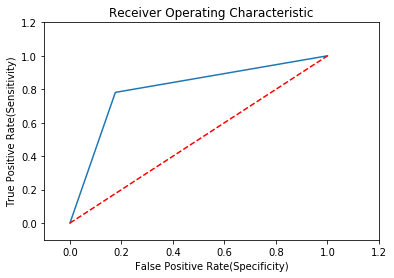

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_test1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.8025072038200949


**Result :** Best model on max_feature = sqrt and n_estimators = 1000.

**On training data :**

* Accuracy on training data : 0.8055943768497205

* Sensitivity on training data : 0.8284978868092409

* Specificity of train data :  0.7810381247657661

* Auc_score : 0.8047680057875035

**On test data :**

* Accuracy on test data : 0.8034181710565256

* Sensitivity on test data is 0.8236629309121861

* Specificity of test data :  0.7813514767280038

* Auc_score : 0.8025072038200949


### Boosting

* Boosting is one more famous ensemble method. Boosting uses a slightly different techniques to that of bagging. 
* Boosting in general decreases the bias error and builds strong predictive models. Boosting is an iterative technique. We adjust the weight of the observation based on the previous classification.
* If an observation was classified incorrectly, it tries to increase the weight of this observation and vice versa.

#### Model without hpyerparameters

In [0]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
features = list(loans1.drop(['SeriousDlqin2yrs','Sr_No'],1).columns)
X = loans1[features]
Y = loans1['SeriousDlqin2yrs']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1)
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)  

In [0]:
boost = GradientBoostingClassifier()

In [0]:
import time
start_time = time.time()
boost = boost.fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 20.788902759552002 seconds ---


#### Confusion matrix and accuracy on training dataset

In [0]:
boost_predict_train = boost.predict(X_train_scaled)
boost_predict_train

array([1, 0, 1, ..., 0, 0, 0])

In [0]:
confusion_matrix_train = cm(y_train,boost_predict_train)
print("Confusion Matrix :\n",confusion_matrix_train)
Accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/sum(sum(confusion_matrix_train))
print("Accuracy on training data is",Accuracy_train)
Sensitivity_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print("Sensitivity on training data is",Sensitivity_train)
Specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print("Specificity on training data is",Specificity_train)

Confusion Matrix :
 [[101281  24615]
 [ 26358  91026]]
Accuracy on training data is 0.7904759947385729
Sensitivity on training data is 0.8044814767744806
Specificity on training data is 0.7754549171948477


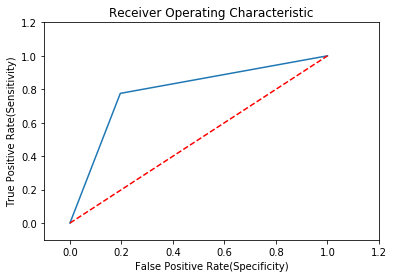

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, boost_predict_train)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7899681969846641


#### Confusion matrix and accuracy on test dataset

In [0]:
boost_predict_test = boost.predict(X_test_scaled)

In [0]:
confusion_matrix_test = cm(y_test,boost_predict_test)
print("Confusion Matrix :\n",confusion_matrix_test)
Accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/sum(sum(confusion_matrix_test))
print("Accuracy on test data is",Accuracy_test)
Sensitivity_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print("Sensitivity on test data is",Sensitivity_test)
Specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print("Specificity on test data is",Specificity_test)

Confusion Matrix :
 [[11261  2817]
 [ 2866 10088]]
Accuracy on test data is 0.7897676827463747
Sensitivity on test data is 0.7999005540559738
Specificity on test data is 0.7787555967268798


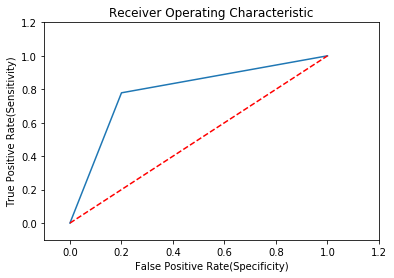

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, boost_predict_test)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.7893280753914268


#### Model using grid search method

In [0]:
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold


# search parameters
param_grid = {'n_estimators' : [5, 10, 25, 50],
              'max_depth' : [1,2,5,10],               
             }

#Scores to be evaluated
scoring = {'Specificity': make_scorer(recall_score, pos_label =0), 'Accuracy': make_scorer(accuracy_score),'Sensitivity':'recall'}

#scores_dict = {'Accuracy':'accuracy', 'Sensitivity':'recall'}

#Cross validation object
outer_cv = KFold(n_splits=10, shuffle=True, random_state=5)

#grid search model
boost = GridSearchCV(GradientBoostingClassifier(), 
                   param_grid, scoring=scoring, refit ='Accuracy', cv=outer_cv)
boost.fit(X_train_scaled,y_train)

# print ('train accuracy', clf_score1)
print("Best estimator found by grid search:",boost.best_estimator_)
# print('Score:', clf_score)
print('Best Score :',boost.best_score_)

Best estimator found by grid search: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Best Score : 0.8434643209470569


In [0]:
pd.DataFrame(boost.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,0.534599,0.8627,1.82723,3.43996,0.822399,1.40699,3.20997,6.09807,2.1599,4.08732,9.74578,18.7681,10.9117,23.0221,60.3567,115.32
std_fit_time,0.00700649,0.00838406,0.0220652,0.0183935,0.00769944,0.0116992,0.0107034,0.0309675,0.0161574,0.0371446,0.0911706,0.0942328,0.130132,0.20499,1.04012,0.631879
mean_score_time,0.032612,0.0352917,0.0425927,0.0568811,0.0339243,0.039108,0.0524353,0.072082,0.0396192,0.0492591,0.0796967,0.126257,0.0517739,0.0741367,0.141156,0.231856
std_score_time,0.00100936,0.000809525,0.00145729,0.00366697,0.000733143,0.00131071,0.000978434,0.00118516,0.00141027,0.000988409,0.00162927,0.00298887,0.00258726,0.00183091,0.00410937,0.00378365
param_max_depth,1,1,1,1,2,2,2,2,5,5,5,5,10,10,10,10
param_n_estimators,5,10,25,50,5,10,25,50,5,10,25,50,5,10,25,50
params,"{'max_depth': 1, 'n_estimators': 5}","{'max_depth': 1, 'n_estimators': 10}","{'max_depth': 1, 'n_estimators': 25}","{'max_depth': 1, 'n_estimators': 50}","{'max_depth': 2, 'n_estimators': 5}","{'max_depth': 2, 'n_estimators': 10}","{'max_depth': 2, 'n_estimators': 25}","{'max_depth': 2, 'n_estimators': 50}","{'max_depth': 5, 'n_estimators': 5}","{'max_depth': 5, 'n_estimators': 10}","{'max_depth': 5, 'n_estimators': 25}","{'max_depth': 5, 'n_estimators': 50}","{'max_depth': 10, 'n_estimators': 5}","{'max_depth': 10, 'n_estimators': 10}","{'max_depth': 10, 'n_estimators': 25}","{'max_depth': 10, 'n_estimators': 50}"
split0_test_Specificity,0.88638,0.88638,0.873658,0.814821,0.883597,0.874135,0.795102,0.791842,0.856166,0.80035,0.791127,0.803053,0.836925,0.828019,0.832949,0.847897
split1_test_Specificity,0.885588,0.885588,0.875129,0.813882,0.88329,0.874812,0.78718,0.788527,0.854766,0.792568,0.786942,0.800254,0.829887,0.827827,0.833452,0.846209
split2_test_Specificity,0.886795,0.886795,0.87509,0.801972,0.88431,0.742644,0.795077,0.797242,0.860258,0.79636,0.791149,0.807424,0.840536,0.832037,0.835645,0.850958


In Boosting we get best score is 0.8434643209470569 with specificity is 0.852179 by max_depth=10 and n_estimators=50.

In [0]:
boost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
import time
start_time = time.time()
boost = boost.fit(X_train_scaled,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 136.5046842098236 seconds ---


#### Confusion matrix and accuracy on training dataset

In [0]:
boost_predict_train = boost.predict(X_train_scaled)
print(boost_predict_train)
confusion_matrix_train = cm(y_train,boost_predict_train)
print("Confusion Matrix :\n",confusion_matrix_train)
Accuracy_train = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/sum(sum(confusion_matrix_train))
print("Accuracy on training data is",Accuracy_train)
Sensitivity_train = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print("Sensitivity on training data is",Sensitivity_train)
Specificity_train = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
print("Specificity on training data is",Specificity_train)

[1 1 1 ... 0 1 0]
Confusion Matrix :
 [[109149  16747]
 [ 19147  98237]]
Accuracy on training data is 0.8524580730023019
Sensitivity on training data is 0.8669775052424223
Specificity on training data is 0.8368857765964697


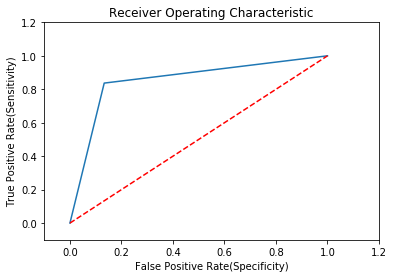

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, boost_predict_train)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.851931640919446


#### Confusion matrix and accuracy on test dataset

In [0]:
boost_predict_test = boost.predict(X_test_scaled)
confusion_matrix_test = cm(y_test,boost_predict_test)
print("Confusion Matrix :\n",confusion_matrix_test)
Accuracy_test = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/sum(sum(confusion_matrix_test))
print("Accuracy on test data is",Accuracy_test)
Sensitivity_test = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
print("Sensitivity on test data is",Sensitivity_test)
Specificity_test = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
print("Specificity on test data is",Specificity_test)

Confusion Matrix :
 [[11999  2079]
 [ 2173 10781]]
Accuracy on test data is 0.8427049422906185
Sensitivity on test data is 0.852322773121182
Specificity on test data is 0.8322525860737996


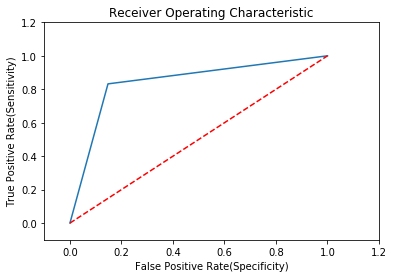

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, boost_predict_test)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [0]:
Auc_score = auc(false_positive_rate, true_positive_rate)
print('Auc_score :', Auc_score)

Auc_score : 0.8422876795974908


**Result :** Best model on max_deapth = 10 and n_estimators = 50.

**On training data :**

* Accuracy on training data : 0.8524580730023019

* Sensitivity on training data : 0.8669775052424223

* Specificity on training data is 0.8368857765964697

* Auc_score : 0.851931640919446

**On test data :**

* Accuracy on test data : 0.8427049422906185

* Sensitivity on test data : 0.852322773121182

* Specificity on test data : 0.8322525860737996

* Auc_score : 0.8422876795974908



### Bar Plot

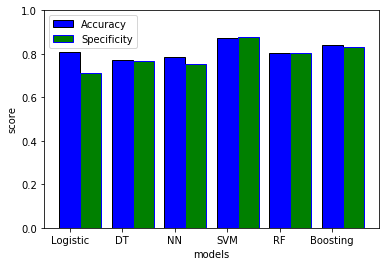

In [0]:
import numpy as np
models = ['Logistic','DT','NN','SVM','RF','Boosting']
score = ['Accuracy','Specificity']
bar_width = 0.4
pos = np.arange(len(models))
Index_accuracy = [0.8068666666666666,0.77, 0.7844911213416639,0.8750739863865049, 0.8034181710565256,0.8427049422906185]
Index_specificity = [0.713307240704501,0.7654170622826966,0.7515077486831055,0.8782222902164767, 0.8025072038200949,0.8322525860737996]
plt.bar(pos,Index_accuracy,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Index_specificity,bar_width,color='green',edgecolor='blue')
plt.xticks(pos, models)
plt.xlabel('models')
plt.ylabel('score')
plt.ylim((0,1))
plt.legend(score)
plt.show()